In [4]:
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV, LassoCV
np.random.seed(42) # set seed number for my random generators
import matplotlib.pyplot as plt

income_hat = w1*age + w2*education + w3*gender + w4*marital status
Each of these have different weights (w) so influencing the target variable in different ways

w gives the slope of the line. bias/offset/y-intercept (b, or sometimes w0) is where you move the line up and down without changing the slope.

income_hat_1 = w0 + w1*34 + w2*15 + w3*1 (man) + w4*1 (34year old, 15yr education, male, married)
income_hat_2 = w0 + w1*38 +w2*12 + w3*0 + w4*1 (38 yearold, 12 years education, female, married)

(income_1 - income_hat_1)^2 + (income_2 - income_2_hat)^2 #True value for individual1 versus predicted value for person1, + residual for person 2 etc etc. Squared to give a positive number (otherwise they'll just cancel), also means that cost is exponentially higher the further away from the line the point is

In [2]:
# generate some random numbers
X = 2*np.random.rand(100,1) # generate 100 random numbers uniformly distributed between 0 and 1, then multiply by 2

In [3]:
X

array([[1.66714206],
       [1.55157835],
       [0.74807346],
       [1.04790388],
       [1.15728032],
       [1.70875346],
       [0.19396216],
       [0.51649312],
       [1.64189393],
       [1.81528766],
       [0.76506286],
       [1.82655767],
       [1.8595694 ],
       [1.31723934],
       [1.2828806 ],
       [0.44033322],
       [1.01861721],
       [0.48406625],
       [0.82173786],
       [0.12019457],
       [1.88204127],
       [1.68815718],
       [0.7594832 ],
       [1.67297027],
       [1.03918417],
       [1.55839198],
       [1.28940076],
       [1.48268692],
       [1.41964315],
       [0.60232967],
       [0.97215722],
       [1.73558599],
       [1.32996937],
       [1.96536078],
       [1.40827502],
       [0.81795305],
       [1.80037048],
       [1.12695776],
       [0.38649326],
       [1.94755642],
       [0.67241691],
       [1.0544379 ],
       [0.94055287],
       [0.31691883],
       [1.18716926],
       [1.9255305 ],
       [1.97442322],
       [1.823

In [6]:
y = 4 + 3*X + np.random.randn(100,1) # w0 = 4, w1=3, + random noise which is normally distributed with mean = 0 and std = 1 


If I gave you only y (values) and X (values), can you estimate 4 and 3 (parameters w0 and w1)?

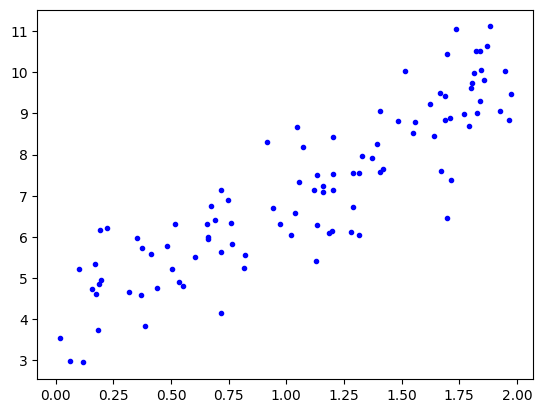

In [7]:
plt.plot(X, y, 'b.') # plot in blue colour X and y

In [ ]:
How do find the line that minimises the total distance between the data and the line? Line should give us our parameters w0 and w1.
y = 4 + 3*X #get rid of noise as there's no way we can determine that 
y = 4*1 + 3*X
y = [4 3] * [1 X]
y = [w0 w1] * [1 X]

y = w*X # reduces down to multiplication of a vector with a matrix
y * inv(X) = w * X * inv (X) # X * inv(X) = 1 (e.g. 6 * 1/6 = 1)
w = y * inv(X) # this only works if X is a square matrix. Usually, it won't be!

# e.g titanic datset
X.shape
(1049, 5) # dataset has 1049 rows and 5 columns. Cannot take inverse of a rectangular matrix!

# so need to multiply X by its transpose X^T
X^T.shape
(5, 1049)

# so
y * inv(X) = w * X * X^T # X*X^T is a square matrix. So now can take inverse of the square matrix inv(X* X^T) * (X*X^T) = 1

y * X^T * inv(X * X^T) = w * X * X^T * inv(X * X^T)

y * X^T *inv(X * X^T) = w # without any simulation, just maths, you can estimate w

In [10]:
X_b = np.c_[np.ones((100,1)), X]
X_b # added 1 next to X (1 is coming from w0, which is 'actually' w0*1)

array([[1.        , 1.66714206],
       [1.        , 1.55157835],
       [1.        , 0.74807346],
       [1.        , 1.04790388],
       [1.        , 1.15728032],
       [1.        , 1.70875346],
       [1.        , 0.19396216],
       [1.        , 0.51649312],
       [1.        , 1.64189393],
       [1.        , 1.81528766],
       [1.        , 0.76506286],
       [1.        , 1.82655767],
       [1.        , 1.8595694 ],
       [1.        , 1.31723934],
       [1.        , 1.2828806 ],
       [1.        , 0.44033322],
       [1.        , 1.01861721],
       [1.        , 0.48406625],
       [1.        , 0.82173786],
       [1.        , 0.12019457],
       [1.        , 1.88204127],
       [1.        , 1.68815718],
       [1.        , 0.7594832 ],
       [1.        , 1.67297027],
       [1.        , 1.03918417],
       [1.        , 1.55839198],
       [1.        , 1.28940076],
       [1.        , 1.48268692],
       [1.        , 1.41964315],
       [1.        , 0.60232967],
       [1.

In [12]:
X_b.shape, X_b.T.shape

((100, 2), (2, 100))

In [ ]:
y * X^T *inv(X * X^T) = w 

In [16]:
w_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # use the equation above to calculate dot products and estimate params
w_best # best estimate using the 'closed form solution' to this problem (given the noise)


array([[3.91373308],
       [2.98386858]])

Expecting 4 and 3 for our params w0 and w1, so this isn't a bad estimate. BUT! as X gets larger and larger, our matrix gets larger and larger too and taking the inverse of a matrix is very computationally expensive, and the closed form solution is no longer feasible.

So instead we use another solution! Gradient descent, uses an algorithim (iterations) instead to estimate the parameters of the model

# Gradient descent

For ML algorithims, goal is to minimise difference between prediction and ground truth.
Gradient descent tweaks parameters iteratively to minimize a cost function (Ltheta)

In [ ]:
Wage = w0 + w1*Age + noise # my goal is estimating w0 and w1
person1: Wage1hat = w0 + w1*Age1
person2: Wage2hat = w0 + w1*Age2
...
PN: WageNhat = w0 + w1*AgeN #note that the parameters are the same for all data points (people in this case). This makes linear regression a parametric test, cf KNN which is not parametric, does not have common parameters across all data points

n number of people, n number of predictions (WageNhat)

these predictions are based on specific [w0 w1] values

squared error:(Wage1 - Wage1hat)^2 + (Wage2 - Wage2hat)^2 ... + (WageN - WageNhat)^2

note: 19mins into Lecture March 19th